In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import trainer
from utils.preprocess_data import *
import yaml
import matplotlib.pyplot as plt
from utils.train_utils import prepare_models, prepare_objectives, prepare_dataloaders
# import inference
import numpy as np
import torch
from torch import nn

In [4]:
base_dir = '/home/toannn/PythonCode/ISIC2024/metadata'
config_path = os.path.join(base_dir, 'configs/default.yaml')

with open(config_path,'r') as f:
    config = yaml.safe_load(f)
print(config)

{'metadata_folder': '/home/toannn/PythonCode/ISIC2024/dataset/data2024', 'random_split': True, 'n_folds': 5, 'valid_size': 0.2, 'batch_size': 64, 'model': {'fcn': {'hidden_layers': [128, 256, 128, 16], 'output_dim': 1}}, 'optimizer': 'SGD', 'learning_rate': 0.01, 'scheduler': 'ReduceLROnPlateau', 'num_epochs': 10, 'device': 'cpu', 'continue_training': False, 'trained_weights': '', 'save_checkpoint': '/content/drive/MyDrive/Colab Notebooks/PhD Test/checkpoints/all_states.pt', 'save_model_checkpoint': '/content/drive/MyDrive/Colab Notebooks/PhD Test/checkpoints/model_weights.pt', 'save_matlab_checkpoint': '/content/drive/MyDrive/Colab Notebooks/PhD Test/checkpoints/matlab_weights.mat'}


In [5]:
data_processed, meta_handler, meta_features = preprocess(config)

/home/toannn/PythonCode/ISIC2024/metadata/utils/preprocess_data.py:12: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_2024 = pd.read_csv(os.path.join(config["metadata_folder"],'train-metadata.csv'))
/home/toannn/Documents/toanenv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Dropped color_uniformity column due to inf values


In [ ]:

training_loader, validation_loader = prepare_dataloaders(config, data_processed)


In [ ]:
input_dim = data_processed['x_train'].shape[1]
print("Number of features:", input_dim)
model = prepare_models(input_dim, config)


Number of features: 126


In [ ]:
criterion, optimizer, scheduler = prepare_objectives(config, model)


In [ ]:
lr = optimizer.param_groups[0]['lr']
print("Current learning rate:", lr)
opt_name = optimizer.__class__.__name__
print("Optimizer name:", opt_name)

Current learning rate: 0.01
Optimizer name: SGD


In [ ]:
if config['continue_training']:
    model.load_state_dict(torch.load(
        config['trained_weights'])['model_state_dict'])
    epoch = torch.load(config['trained_weights'])['epoch']
else:
    epoch = 0

train_loss_list, valid_loss_list = \
                    trainer.train_and_evaluate(config, training_loader, validation_loader,
                    model, criterion, optimizer, scheduler, epoch)

UnboundLocalError: local variable 'epoch_loss' referenced before assignment

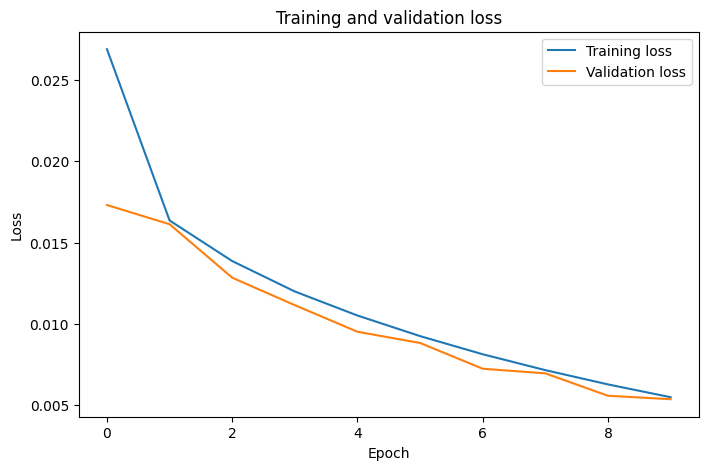

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(train_loss_list, label='Training loss')
ax.plot(valid_loss_list, label='Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:

#save_model_to_matlab(config,model)


	 R2 score: 0.90433 |  MSE Loss: 0.26057367 |  RMSE loss: 0.51046417


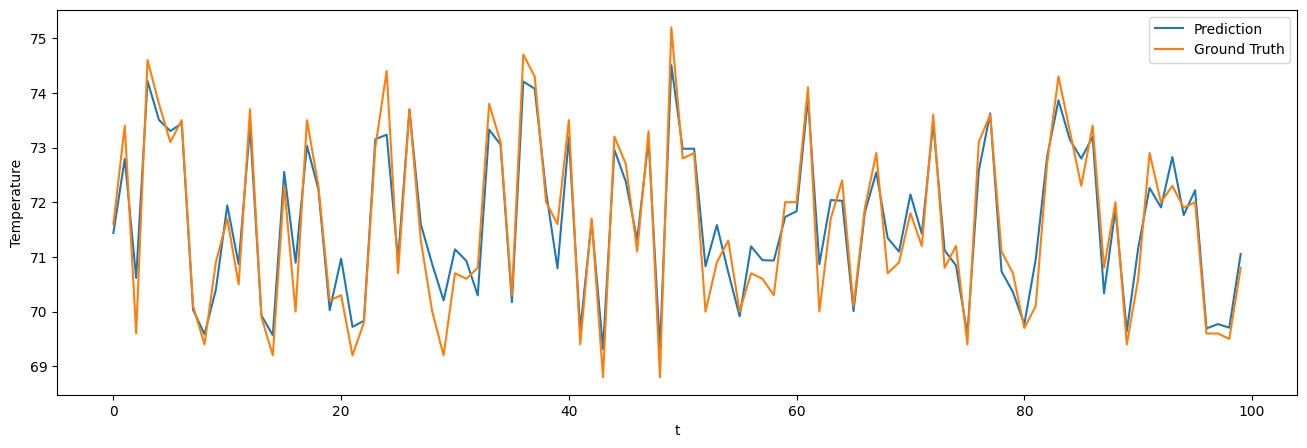

In [ ]:
y_true, y_pred = inference.infer_numpy_data(data_processed, model, X_scaler, y_scaler,config)
n = 100
f_size = (10,10) if config['sequence'] else (16,5)
inference.plot_data(y_true,y_pred,n,config,f_size)

In [ ]:
test_dataloader = inference.prepare_test_loader(config,data_processed)
rmse, mse, r2_score  = inference.infer_data(config, model, test_dataloader, y_scaler)


	 R2 score: 0.90177 |  MSE Loss: 0.26048492 |  RMSE loss: 0.50918606
